In [18]:
from sample_anchors import sample_concentrating_sphere, project_onto_planes
import torch
import numpy as np
import matplotlib.pyplot as plt
r = torch.linspace(0.5, 32-0.5, 32, device='cuda')
anchors_coordinates = sample_concentrating_sphere(r, 400, threshold = 10.0,device='cuda')

In [13]:
anchors_coordinates = anchors_coordinates[None, :, :].repeat(1, 1, 1)
anchors_plane_coordinates_all = project_onto_planes(anchors_coordinates)

Batch size: 1, Points per batch: 12800
Visualizing batch index: 0
Randomly sampling 12800 points for visualization...
Tensor detected on device: cuda:0. Moving to CPU for plotting.
Plotting 12800 points...
Displaying plot...


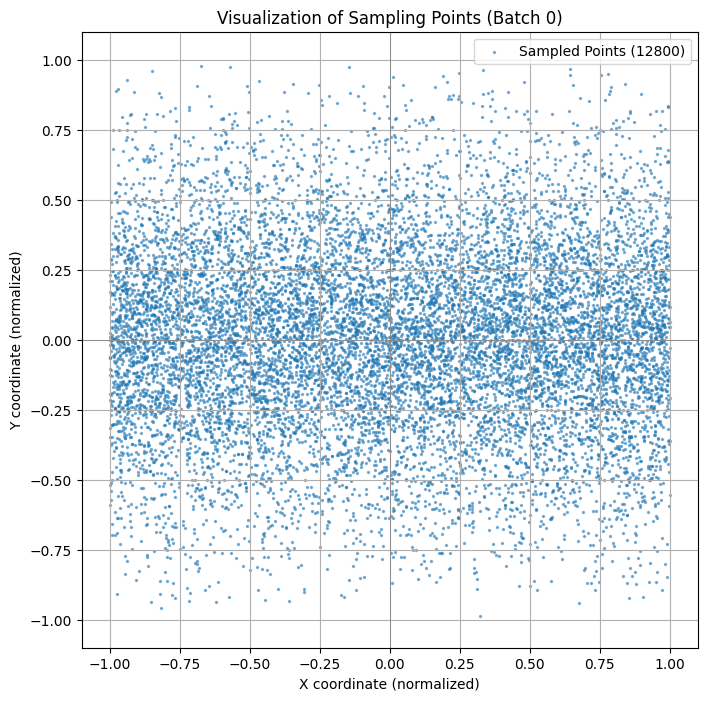

In [19]:
anchors_plane_coordinates = anchors_plane_coordinates_all[:,0,:,:]
anchors_plane_coordinates.shape
# 确保张量存在且形状正确
assert 'anchors_plane_coordinates' in locals() and isinstance(anchors_plane_coordinates, torch.Tensor), "anchors_plane_coordinates tensor not found."
assert anchors_plane_coordinates.dim() == 3 and anchors_plane_coordinates.shape[2] == 2, f"Expected shape [B, N, 2], but got {anchors_plane_coordinates.shape}"

# 获取批次大小和点数
batch_size, N, _ = anchors_plane_coordinates.shape
print(f"Batch size: {batch_size}, Points per batch: {N}")

# --- 1. 选择要可视化的批次和点的子集 ---

# 选择要可视化的批次索引 (例如，第一个批次)
batch_index_to_visualize = 0
if batch_index_to_visualize >= batch_size:
    print(f"Error: batch_index_to_visualize ({batch_index_to_visualize}) is out of bounds for batch size {batch_size}.")
    exit()

print(f"Visualizing batch index: {batch_index_to_visualize}")

# 选择要可视化的点的数量
num_points_to_visualize = 12800 # <--- 调整这个数量, e.g., 1000, 5000, 10000
if num_points_to_visualize > N:
    print(f"Warning: num_points_to_visualize ({num_points_to_visualize}) is greater than N ({N}). Visualizing all points in the selected batch.")
    num_points_to_visualize = N
    indices = np.arange(N) # 选择所有点
elif num_points_to_visualize <= 0:
    print("Warning: num_points_to_visualize must be positive. Not visualizing any points.")
    indices = np.array([]) # Empty selection
else:
    # 随机选择索引
    print(f"Randomly sampling {num_points_to_visualize} points for visualization...")
    indices = np.random.choice(N, num_points_to_visualize, replace=False)

# --- 2. 提取数据并转换为 NumPy ---
# 检查张量是否在 GPU 上，如果在则移到 CPU
device = anchors_plane_coordinates.device
if device != torch.device('cpu'):
    print(f"Tensor detected on device: {device}. Moving to CPU for plotting.")
    coordinates_cpu = anchors_plane_coordinates.cpu()
else:
    coordinates_cpu = anchors_plane_coordinates

# 提取选定批次的子集点并转换为 NumPy
# 只对选中的索引进行转换，提高效率
points_subset = coordinates_cpu[batch_index_to_visualize, indices].detach().numpy() # Shape (num_points_to_visualize, 2)

# --- 3. 可视化 2D 散点图 ---
if len(indices) > 0: # 只有当选中了点时才绘图
    print(f"Plotting {len(indices)} points...")
    fig, ax = plt.subplots(figsize=(8, 8)) # 创建一个方形的 2D 图

    # 提取 X, Y 坐标
    x_coords = points_subset[:, 0]
    y_coords = points_subset[:, 1]

    # 绘制散点图
    ax.scatter(x_coords, y_coords,
               s=2,           # <--- 调整点的大小 (e.g., 1, 2, 5)
               alpha=0.5,     # <--- 调整透明度 (0.1 to 1.0)
               label=f'Sampled Points ({len(indices)})'
              )

    # --- 美化图形 ---
    ax.set_title(f'Visualization of Sampling Points (Batch {batch_index_to_visualize})')
    ax.set_xlabel('X coordinate (normalized)')
    ax.set_ylabel('Y coordinate (normalized)')

    # 设置坐标轴范围为 [-1, 1] (加一点边距)
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])

    # 设置坐标轴比例相等，确保正方形区域看起来是正方形
    ax.set_aspect('equal', adjustable='box')

    ax.legend()
    ax.grid(True)

    # 添加中心线（可选）
    ax.axhline(0, color='grey', lw=0.5)
    ax.axvline(0, color='grey', lw=0.5)

    # 显示图表
    print("Displaying plot...")
    plt.show()
else:
    print("No points selected for visualization.")

Batch size: 1, Points per batch: 12800
Visualizing batch index: 0
Randomly sampling 12800 points for visualization...
Tensor detected on device: cuda:0. Moving to CPU for plotting.
Plotting 12800 points...
Displaying plot...


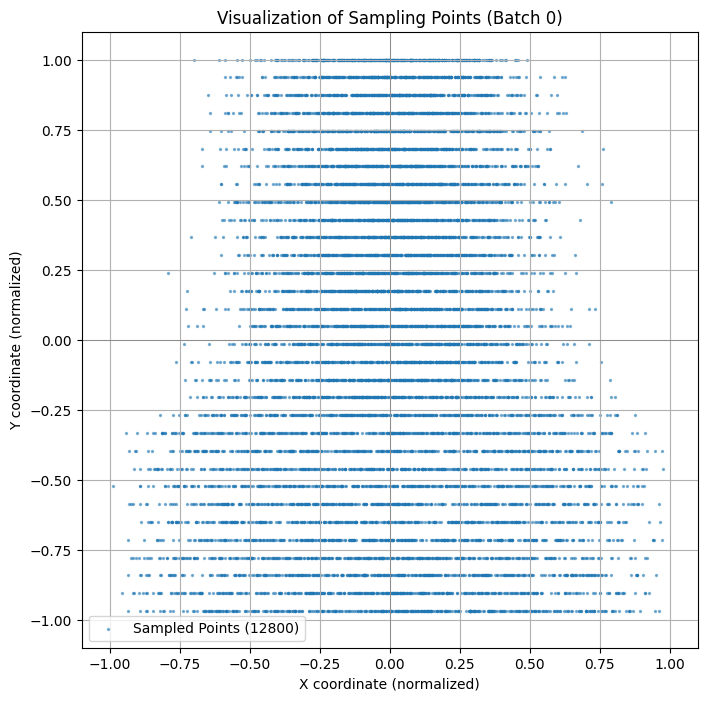

In [20]:
anchors_plane_coordinates = anchors_plane_coordinates_all[:,1,:,:]
anchors_plane_coordinates.shape
# 确保张量存在且形状正确
assert 'anchors_plane_coordinates' in locals() and isinstance(anchors_plane_coordinates, torch.Tensor), "anchors_plane_coordinates tensor not found."
assert anchors_plane_coordinates.dim() == 3 and anchors_plane_coordinates.shape[2] == 2, f"Expected shape [B, N, 2], but got {anchors_plane_coordinates.shape}"

# 获取批次大小和点数
batch_size, N, _ = anchors_plane_coordinates.shape
print(f"Batch size: {batch_size}, Points per batch: {N}")

# --- 1. 选择要可视化的批次和点的子集 ---

# 选择要可视化的批次索引 (例如，第一个批次)
batch_index_to_visualize = 0
if batch_index_to_visualize >= batch_size:
    print(f"Error: batch_index_to_visualize ({batch_index_to_visualize}) is out of bounds for batch size {batch_size}.")
    exit()

print(f"Visualizing batch index: {batch_index_to_visualize}")

# 选择要可视化的点的数量
num_points_to_visualize = 12800 # <--- 调整这个数量, e.g., 1000, 5000, 10000
if num_points_to_visualize > N:
    print(f"Warning: num_points_to_visualize ({num_points_to_visualize}) is greater than N ({N}). Visualizing all points in the selected batch.")
    num_points_to_visualize = N
    indices = np.arange(N) # 选择所有点
elif num_points_to_visualize <= 0:
    print("Warning: num_points_to_visualize must be positive. Not visualizing any points.")
    indices = np.array([]) # Empty selection
else:
    # 随机选择索引
    print(f"Randomly sampling {num_points_to_visualize} points for visualization...")
    indices = np.random.choice(N, num_points_to_visualize, replace=False)

# --- 2. 提取数据并转换为 NumPy ---
# 检查张量是否在 GPU 上，如果在则移到 CPU
device = anchors_plane_coordinates.device
if device != torch.device('cpu'):
    print(f"Tensor detected on device: {device}. Moving to CPU for plotting.")
    coordinates_cpu = anchors_plane_coordinates.cpu()
else:
    coordinates_cpu = anchors_plane_coordinates

# 提取选定批次的子集点并转换为 NumPy
# 只对选中的索引进行转换，提高效率
points_subset = coordinates_cpu[batch_index_to_visualize, indices].detach().numpy() # Shape (num_points_to_visualize, 2)

# --- 3. 可视化 2D 散点图 ---
if len(indices) > 0: # 只有当选中了点时才绘图
    print(f"Plotting {len(indices)} points...")
    fig, ax = plt.subplots(figsize=(8, 8)) # 创建一个方形的 2D 图

    # 提取 X, Y 坐标
    x_coords = points_subset[:, 0]
    y_coords = points_subset[:, 1]

    # 绘制散点图
    ax.scatter(x_coords, y_coords,
               s=2,           # <--- 调整点的大小 (e.g., 1, 2, 5)
               alpha=0.5,     # <--- 调整透明度 (0.1 to 1.0)
               label=f'Sampled Points ({len(indices)})'
              )

    # --- 美化图形 ---
    ax.set_title(f'Visualization of Sampling Points (Batch {batch_index_to_visualize})')
    ax.set_xlabel('X coordinate (normalized)')
    ax.set_ylabel('Y coordinate (normalized)')

    # 设置坐标轴范围为 [-1, 1] (加一点边距)
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])

    # 设置坐标轴比例相等，确保正方形区域看起来是正方形
    ax.set_aspect('equal', adjustable='box')

    ax.legend()
    ax.grid(True)

    # 添加中心线（可选）
    ax.axhline(0, color='grey', lw=0.5)
    ax.axvline(0, color='grey', lw=0.5)

    # 显示图表
    print("Displaying plot...")
    plt.show()
else:
    print("No points selected for visualization.")

Batch size: 1, Points per batch: 12800
Visualizing batch index: 0
Randomly sampling 12800 points for visualization...
Tensor detected on device: cuda:0. Moving to CPU for plotting.
Plotting 12800 points...
Displaying plot...


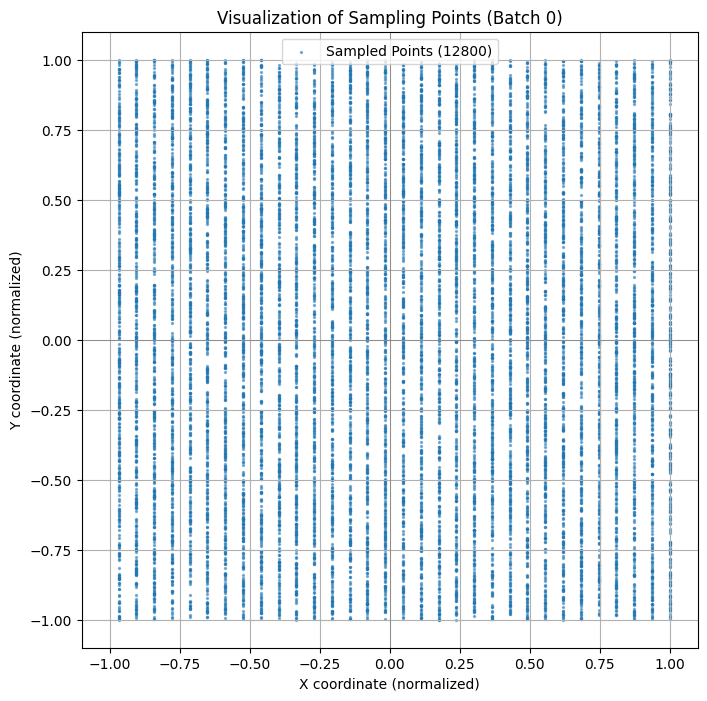

In [21]:
anchors_plane_coordinates = anchors_plane_coordinates_all[:,2,:,:]
anchors_plane_coordinates.shape
# 确保张量存在且形状正确
assert 'anchors_plane_coordinates' in locals() and isinstance(anchors_plane_coordinates, torch.Tensor), "anchors_plane_coordinates tensor not found."
assert anchors_plane_coordinates.dim() == 3 and anchors_plane_coordinates.shape[2] == 2, f"Expected shape [B, N, 2], but got {anchors_plane_coordinates.shape}"

# 获取批次大小和点数
batch_size, N, _ = anchors_plane_coordinates.shape
print(f"Batch size: {batch_size}, Points per batch: {N}")

# --- 1. 选择要可视化的批次和点的子集 ---

# 选择要可视化的批次索引 (例如，第一个批次)
batch_index_to_visualize = 0
if batch_index_to_visualize >= batch_size:
    print(f"Error: batch_index_to_visualize ({batch_index_to_visualize}) is out of bounds for batch size {batch_size}.")
    exit()

print(f"Visualizing batch index: {batch_index_to_visualize}")

# 选择要可视化的点的数量
num_points_to_visualize = 12800 # <--- 调整这个数量, e.g., 1000, 5000, 10000
if num_points_to_visualize > N:
    print(f"Warning: num_points_to_visualize ({num_points_to_visualize}) is greater than N ({N}). Visualizing all points in the selected batch.")
    num_points_to_visualize = N
    indices = np.arange(N) # 选择所有点
elif num_points_to_visualize <= 0:
    print("Warning: num_points_to_visualize must be positive. Not visualizing any points.")
    indices = np.array([]) # Empty selection
else:
    # 随机选择索引
    print(f"Randomly sampling {num_points_to_visualize} points for visualization...")
    indices = np.random.choice(N, num_points_to_visualize, replace=False)

# --- 2. 提取数据并转换为 NumPy ---
# 检查张量是否在 GPU 上，如果在则移到 CPU
device = anchors_plane_coordinates.device
if device != torch.device('cpu'):
    print(f"Tensor detected on device: {device}. Moving to CPU for plotting.")
    coordinates_cpu = anchors_plane_coordinates.cpu()
else:
    coordinates_cpu = anchors_plane_coordinates

# 提取选定批次的子集点并转换为 NumPy
# 只对选中的索引进行转换，提高效率
points_subset = coordinates_cpu[batch_index_to_visualize, indices].detach().numpy() # Shape (num_points_to_visualize, 2)

# --- 3. 可视化 2D 散点图 ---
if len(indices) > 0: # 只有当选中了点时才绘图
    print(f"Plotting {len(indices)} points...")
    fig, ax = plt.subplots(figsize=(8, 8)) # 创建一个方形的 2D 图

    # 提取 X, Y 坐标
    x_coords = points_subset[:, 0]
    y_coords = points_subset[:, 1]

    # 绘制散点图
    ax.scatter(x_coords, y_coords,
               s=2,           # <--- 调整点的大小 (e.g., 1, 2, 5)
               alpha=0.5,     # <--- 调整透明度 (0.1 to 1.0)
               label=f'Sampled Points ({len(indices)})'
              )

    # --- 美化图形 ---
    ax.set_title(f'Visualization of Sampling Points (Batch {batch_index_to_visualize})')
    ax.set_xlabel('X coordinate (normalized)')
    ax.set_ylabel('Y coordinate (normalized)')

    # 设置坐标轴范围为 [-1, 1] (加一点边距)
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])

    # 设置坐标轴比例相等，确保正方形区域看起来是正方形
    ax.set_aspect('equal', adjustable='box')

    ax.legend()
    ax.grid(True)

    # 添加中心线（可选）
    ax.axhline(0, color='grey', lw=0.5)
    ax.axvline(0, color='grey', lw=0.5)

    # 显示图表
    print("Displaying plot...")
    plt.show()
else:
    print("No points selected for visualization.")